In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cars.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df['normalized-losses'].replace("?",np.nan, inplace=True)
df['horsepower'].replace("?",np.nan,inplace=True)

In [4]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [5]:
# lets REplace the Nan with Mean using Simple Imputer or KNN IMputer 

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
si = SimpleImputer(strategy='mean')

In [9]:
df[['normalized-losses','horsepower']] = si.fit_transform(df[['normalized-losses','horsepower']])

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


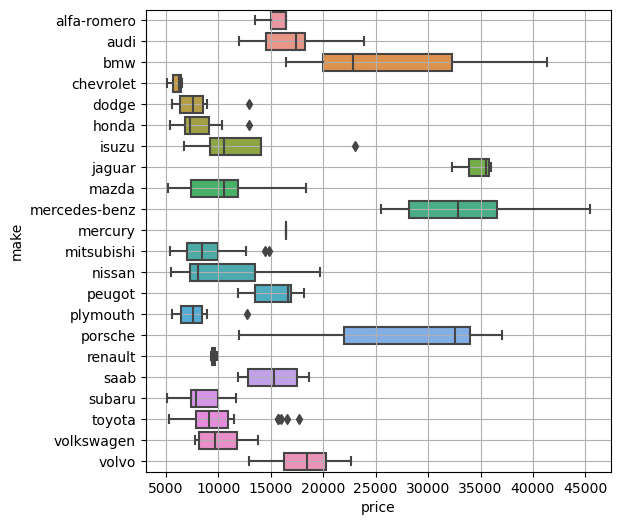

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

In [13]:
def convert(col,other):
    f_df = pd.DataFrame(columns=df.columns)
    for i in df[other].unique():
        temp_df  = df[df[other]==i]
        q1 = temp_df[col].quantile(0.25)
        q3 = temp_df[col].quantile(0.75)
        iqr=q3-q1
        min_val = q1-(1.5*iqr)
        max_val = q3+(1.5*iqr)
        temp_df = temp_df[(temp_df[col]>=min_val) & (temp_df[col]<=max_val)]
        f_df = pd.merge(f_df,temp_df,how="outer")
    return (f_df)

In [14]:
new_df = convert('price','make')
df = new_df
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
190,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
191,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
192,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


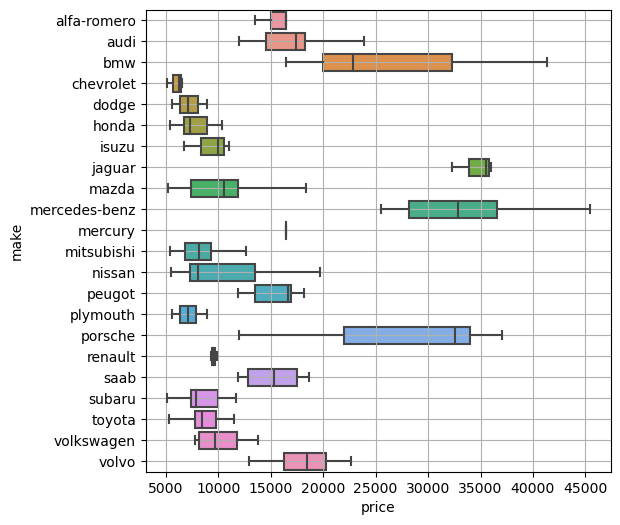

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

## Lets Convert Categorical Column into Numeric Using OrdinalEncoder

In [16]:
catcol = df.select_dtypes(object).columns

In [17]:
catcol

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oe = OrdinalEncoder()

In [20]:
df[catcol] = oe.fit_transform(df[catcol])

In [21]:
df[catcol]

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,1.0,2.0,2.0,0.0,5.0
3,1.0,1.0,3.0,1.0,0.0,3.0
4,1.0,1.0,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...
189,21.0,1.0,3.0,2.0,0.0,3.0
190,21.0,1.0,3.0,2.0,0.0,3.0
191,21.0,1.0,3.0,2.0,0.0,5.0
192,21.0,0.0,3.0,2.0,0.0,3.0


In [22]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,122.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,122.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,164.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,164.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
190,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
191,-1,95.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
192,-1,95.0,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


## Lets Perform Feature Scaling Using Standard Scalar

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
df.drop(columns=['normalized-losses','symboling'],axis=1,inplace=True)

In [26]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
190,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
191,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
192,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [29]:
df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])

In [30]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474,13495
1,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,0.218578,-0.675762,-0.580474,16500
2,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,1.315353,-0.982065,-0.726156,16500
3,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-0.010980,-0.216307,-0.143429,13950
4,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,0.320603,-1.135217,-1.308883,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,0.295097,-0.369459,-0.434792,16845
190,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,1.468391,-0.982065,-0.871838,19045
191,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,0.805225,-1.135217,-1.163201,21485
192,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,0.091046,0.089996,-0.580474,22470


## Train Test Split

In [38]:
x = df.iloc[:,:-1].values

In [39]:
x

array([[-1.93400671,  0.33903175, -3.11163379, ...,  0.21857766,
        -0.67576177, -0.58047414],
       [-1.93400671,  0.33903175, -3.11163379, ...,  0.21857766,
        -0.67576177, -0.58047414],
       [-1.93400671,  0.33903175, -0.74898426, ...,  1.3153526 ,
        -0.982065  , -0.72615588],
       ...,
       [ 1.413123  ,  0.33903175,  0.43234051, ...,  0.80522472,
        -1.13521662, -1.16320109],
       [ 1.413123  , -2.94957624,  0.43234051, ...,  0.09104569,
         0.08999631, -0.58047414],
       [ 1.413123  ,  0.33903175,  0.43234051, ...,  0.29509684,
        -0.982065  , -0.87183761]])

In [40]:
y = df.iloc[:,-1].values

In [41]:
y

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       12000, 16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,
        5151,  6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,
        8558,  8921,  6479,  6855,  5399,  6529,  7129,  7295,  7295,
        7895,  9095,  8845, 10295, 10345,  6785, 10000, 11048, 32250,
       35550, 36000,  5195,  6095,  6795,  6695,  7395, 10945, 11845,
       13645, 15645,  8845,  8495, 10595, 10245, 10795, 11245, 18280,
       18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400,
       16503,  5389,  6189,  6669,  7689,  9959,  8499, 12629,  6989,
        8189,  9279,  9279,  5499,  7099,  6649,  6849,  7349,  7299,
        7799,  7499,  7999,  8249,  8949,  9549, 13499, 14399, 13499,
       17199, 19699, 18399, 11900, 13200, 12440, 13860, 15580, 16900,
       16695, 17075, 16630, 17950, 18150,  5572,  7957,  6229,  6692,
        7609,  8921, 22018, 32528, 34028, 37028, 12000,  9295,  9895,
       11850, 12170,

In [43]:
194*30/100

58.2

In [44]:
194*70/100

135.8

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [53]:
xtrain

array([[-0.02136116,  0.33903175, -0.74898426, ...,  1.46839096,
        -0.982065  , -0.87183761],
       [ 1.413123  ,  0.33903175,  0.43234051, ...,  0.29509684,
        -0.36945854, -0.4347924 ],
       [-1.45584532,  0.33903175, -0.74898426, ..., -1.38832516,
         3.30618025,  3.20725104],
       ...,
       [-0.34013542,  0.33903175, -0.74898426, ...,  1.85098687,
        -0.982065  , -1.01751935],
       [ 0.93496161,  0.33903175,  1.61366527, ..., -0.52110776,
         0.39629954,  0.14793455],
       [-1.13707106,  0.33903175, -0.74898426, ..., -0.41908219,
         0.24314793,  0.29361629]])

In [54]:
xtest

array([[-8.18296805e-01,  3.39031752e-01,  4.32340507e-01,
         1.23460795e+00, -1.25326798e-01,  1.69793056e+00,
        -4.18623633e-01, -3.11085213e+00,  3.15708000e+00,
         1.87649326e+00, -1.59467147e+00, -1.74592804e+00],
       [ 1.25373587e+00,  3.39031752e-01,  4.32340507e-01,
        -5.66248758e-01, -1.25326798e-01, -1.79636474e-01,
         7.69059957e-01, -7.81621138e-02, -3.96602028e-01,
        -4.44588583e-01,  2.43147927e-01,  4.39298023e-01],
       [ 1.09434874e+00,  3.39031752e-01, -7.48984258e-01,
         1.23460795e+00, -1.25326798e-01, -1.33842156e-01,
        -7.46260485e-01, -7.81621138e-02,  4.85855925e-01,
         3.46109628e-01, -2.16306922e-01, -1.43428927e-01],
       [-1.13707106e+00,  3.39031752e-01,  1.61366527e+00,
        -5.66248758e-01, -1.25326798e-01, -9.12345559e-01,
         1.83387973e+00, -7.81621138e-02, -8.02055682e-01,
        -6.74146128e-01,  7.02602775e-01,  4.39298023e-01],
       [ 9.34961611e-01,  3.39031752e-01,  4.3234050

In [51]:
ytrain

array([17199, 16845,  5151,  9298,  5572, 13645,  7775,  9549,  5389,
        8449, 13415, 20970, 16695,  5499,  7788,  8189, 15580, 22018,
       21105, 16515,  7995, 35550,  7799,  7895,  9995, 13845,  7898,
        8949,  8249, 21485,  9639,  9988,  6669,  5572,  7499,  6918,
       16500, 40960,  7099,  6338, 17710, 13200, 13495,  6938,  9959,
       28248, 15645,  8921,  7349,  9495, 36000, 18280,  6189,  7999,
        8358,  9233,  6849, 10898, 22470, 18150, 16430,  7295,  6529,
        9538,  8845,  9279,  7198, 22625,  8558, 19699,  9895,  7957,
       11850, 12000, 11549, 12440,  9980,  7126, 17950, 12940, 25552,
       30760,  6785,  8238, 17075,  6989, 10945,  7609,  7689, 11048,
        6229, 13950, 11199,  6795,  8778, 18620, 15985,  6855, 34028,
        6229, 11248, 23875, 10795, 15040, 16500,  8495,  6377, 11245,
       18344, 18920, 19045, 10198,  6649, 13499, 34184,  6695,  8013,
        8058,  9258, 11259,  6488, 18399,  6575, 11595,  6692,  7603,
       45400, 15510,

In [55]:
ytest

array([32250,  7975,  9989,  7295,  7775, 16925, 12000,  9279,  8495,
       11900,  8195, 13295,  6479, 41315, 11694,  8948,  8921,  7395,
        5399, 37028,  5195, 17450, 13499,  8845,  8499, 10595,  5118,
        9295, 11845, 12170, 31600, 32528, 10245, 14399, 18420, 24565,
       10345,  6295, 16630, 18150,  7957, 10698, 35056,  7898,  7129,
        7299,  7738, 18950, 13860, 16900, 10000, 36880, 15250,  7609,
       12290,  6095, 10295,  6692, 28176], dtype=int64)

## Model Evaluation 

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
linreg = LinearRegression()

In [56]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [57]:
ypred = linreg.predict(xtest)

In [58]:
ypred

array([31039.71913769,  9391.4346782 , 14280.87937937,  9423.69113874,
        8402.99737836, 13226.85895802, 27937.81919015, 10420.45357341,
        9391.4346782 , 16689.97696683,  9391.4346782 , 14374.52465763,
        3950.14758241, 26425.07722867,  9766.91092773, 11177.64531501,
       13897.74543371,  7076.02761873,  5314.27406636, 34263.88406221,
        8342.77330541, 15290.03592584, 19721.85380537, 12525.26990348,
        9909.24371294, 12525.26990348,  6083.22629638, 12967.1648732 ,
        9139.0301424 , 13043.77010857, 26679.01901838, 34028.        ,
       12942.82142198, 20275.84183827, 17269.40137246, 20859.96180413,
       10895.75378206,  6101.99376083, 16689.97696683, 18602.93833221,
        7562.48405522, 11536.92214112, 28866.35889866,  8619.05611372,
        7893.54942802,  7090.00135292,  4701.3426328 , 17505.44300742,
       21363.42242198, 19712.8022559 ,  5465.16034755, 29675.75221409,
       15635.38936199,  5390.3021724 , 10378.64341283,  7311.91168094,
      

In [59]:
linreg.coef_

array([ -838.52306479,  -503.55132208,  -199.67757328,   779.81261895,
        1567.09191453,  1469.67659391,   886.3954452 ,   -29.43711721,
        3494.12745101,   938.49160836,    62.10042032, -1020.20082756])

In [60]:
linreg.intercept_

13153.844965813096

## Regression Evaluation Metrics

In [62]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f" MAE :- {mae}\n MSE :- {mse}\n RMSE :- {rmse}\n Accuracy :- {r2}")

 MAE :- 2764.1536622977233
 MSE :- 16618013.849173572
 RMSE :- 4076.519820775262
 Accuracy :- 0.7978524643516384


In [63]:
train = linreg.score(xtrain,ytrain)
test  = linreg.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result:- {test}")

# Low Bias 
# High Variance 
# Overfitting

Training Result :- 0.8924469792798866
Testing Result:- 0.7978524643516384


## Lets Perform Regularization Using Ridge And Lasso 

In [64]:
from sklearn.linear_model import Ridge, Lasso

## Ridge

In [67]:
for i in range(1,50):
    l2 = Ridge(alpha = i)
    l2.fit(xtrain,ytrain)
    
    train = l2.score(xtrain,ytrain)
    test = l2.score(xtest,ytest)
    
    print(f" {i},Training: {train} and Testing: {test}")

 1,Training: 0.8924093684744303 and Testing: 0.7961876053706846
 2,Training: 0.8923173096154876 and Testing: 0.7947900682244143
 3,Training: 0.8921850387190932 and Testing: 0.7935503435033445
 4,Training: 0.892019389173935 and Testing: 0.7924161378142383
 5,Training: 0.8918248823942181 and Testing: 0.7913577384985354
 6,Training: 0.8916049307706881 and Testing: 0.7903562906820901
 7,Training: 0.8913622691485705 and Testing: 0.7893989304889721
 8,Training: 0.8910991637613921 and Testing: 0.7884764403598247
 9,Training: 0.8908175341567783 and Testing: 0.7875819848726591
 10,Training: 0.8905190324492542 and Testing: 0.7867103675911916
 11,Training: 0.8902050982730194 and Testing: 0.7858575640107758
 12,Training: 0.8898769985528713 and Testing: 0.785020412386909
 13,Training: 0.8895358572146564 and Testing: 0.7841964005973219
 14,Training: 0.8891826779539458 and Testing: 0.7833835144231405
 15,Training: 0.8888183620665342 and Testing: 0.7825801267498467
 16,Training: 0.888443722677325 and 

In [70]:
linreg.coef_

array([ -838.52306479,  -503.55132208,  -199.67757328,   779.81261895,
        1567.09191453,  1469.67659391,   886.3954452 ,   -29.43711721,
        3494.12745101,   938.49160836,    62.10042032, -1020.20082756])

In [71]:
l2.coef_

array([-583.83751833, -573.24781378,  -71.69278147,  851.39864863,
        907.45383787, 1374.66710762,  661.20344148,   60.8517848 ,
       2311.82082773, 1274.37284156, -601.20854768, -761.34245563])

In [72]:
linreg.intercept_

13153.844965813096

In [73]:
l2.intercept_

13071.841739760994

## Lasso

In [69]:
for i in range(1,500):
    l3 = Lasso(alpha = i)
    l3.fit(xtrain,ytrain)
    
    train = l3.score(xtrain,ytrain)
    test = l3.score(xtest,ytest)
    
    print(f" {i},Training: {train} and Testing: {test}")

 1,Training: 0.8924448740800115 and Testing: 0.7976497003691108
 2,Training: 0.892443691980118 and Testing: 0.7976094179334055
 3,Training: 0.8924427283868608 and Testing: 0.7975864941319466
 4,Training: 0.8924413981709088 and Testing: 0.7975550922565618
 5,Training: 0.8924396803507879 and Testing: 0.7975276527748423
 6,Training: 0.8924375947742649 and Testing: 0.7974952584196466
 7,Training: 0.8924351316037402 and Testing: 0.797462568498077
 8,Training: 0.8924322748511582 and Testing: 0.7974340257064714
 9,Training: 0.8924290560035977 and Testing: 0.7974002846294163
 10,Training: 0.8924254601259017 and Testing: 0.7973660188056639
 11,Training: 0.8924214643459263 and Testing: 0.7973361027146912
 12,Training: 0.8924171127322813 and Testing: 0.7973007856560603
 13,Training: 0.8924123840909763 and Testing: 0.7972649438480142
 14,Training: 0.8924072783307854 and Testing: 0.7972287232671281
 15,Training: 0.8924017642619524 and Testing: 0.7971967698824384
 16,Training: 0.8923959026957646 and

 169,Training: 0.8883040135781644 and Testing: 0.7861958716973994
 170,Training: 0.8882606656526879 and Testing: 0.7860977900581291
 171,Training: 0.8882167954498428 and Testing: 0.7860050216773964
 172,Training: 0.8881729357967445 and Testing: 0.7859061212046629
 173,Training: 0.8881288198931357 and Testing: 0.7858068334709832
 174,Training: 0.8880844484633998 and Testing: 0.7857071437969373
 175,Training: 0.8880398214885273 and Testing: 0.7856070525878964
 176,Training: 0.8879949389685183 and Testing: 0.7855065598438609
 177,Training: 0.8879498009033728 and Testing: 0.7854056655648306
 178,Training: 0.8879044072930908 and Testing: 0.7853043697508055
 179,Training: 0.8878587581376723 and Testing: 0.7852026724017855
 180,Training: 0.8878125635077956 and Testing: 0.785106462102376
 181,Training: 0.8877664018098599 and Testing: 0.7850039616921097
 182,Training: 0.8877199845943614 and Testing: 0.7849010592577212
 183,Training: 0.8876733119251381 and Testing: 0.78479775364502
 184,Training

 322,Training: 0.8786916704121264 and Testing: 0.7666175069593963
 323,Training: 0.878609184780473 and Testing: 0.7664581798229286
 324,Training: 0.8785264435237228 and Testing: 0.7662984512398269
 325,Training: 0.8784434466418755 and Testing: 0.7661383212100905
 326,Training: 0.8783601939361599 and Testing: 0.7659777918661801
 327,Training: 0.8782766822816994 and Testing: 0.7658168973408788
 328,Training: 0.8781929086523801 and Testing: 0.7656556703887412
 329,Training: 0.8781088793395236 and Testing: 0.7654940420362925
 330,Training: 0.8780245943431298 and Testing: 0.7653320122835326
 331,Training: 0.8779400514378919 and Testing: 0.7651696077370369
 332,Training: 0.8778552521310073 and Testing: 0.7650068102096406
 333,Training: 0.8777701971233475 and Testing: 0.764843611298754
 334,Training: 0.8776842817686388 and Testing: 0.7646858176562717
 335,Training: 0.8775987200912556 and Testing: 0.7645217410237642
 336,Training: 0.877512902750887 and Testing: 0.7643572629728966
 337,Training

 450,Training: 0.8675055144714925 and Testing: 0.7449845080933225
 451,Training: 0.8674078378656883 and Testing: 0.7447977937363445
 452,Training: 0.8673099445488708 and Testing: 0.7446107325350158
 453,Training: 0.86721183452104 and Testing: 0.7444233244893368
 454,Training: 0.8671135077821959 and Testing: 0.744235569599307
 455,Training: 0.8670149643323385 and Testing: 0.7440474678649266
 456,Training: 0.8669162041714678 and Testing: 0.7438590192861959
 457,Training: 0.8668172272995838 and Testing: 0.7436702238631143
 458,Training: 0.8667180337166864 and Testing: 0.7434810815956824
 459,Training: 0.8666186234227757 and Testing: 0.7432915924838999
 460,Training: 0.8665189964178519 and Testing: 0.7431017565277667
 461,Training: 0.8664191470451679 and Testing: 0.7429116016541882
 462,Training: 0.8663190789511017 and Testing: 0.7427211097008152
 463,Training: 0.8662187941132953 and Testing: 0.7425302708802677
 464,Training: 0.8661182925317488 and Testing: 0.7423390851925453
 465,Training

In [74]:
linreg.coef_

array([ -838.52306479,  -503.55132208,  -199.67757328,   779.81261895,
        1567.09191453,  1469.67659391,   886.3954452 ,   -29.43711721,
        3494.12745101,   938.49160836,    62.10042032, -1020.20082756])

In [75]:
l3.coef_

array([-106.30347417,   -0.        ,    0.        ,  567.70626135,
        567.13729379, 1647.36763708,   93.04266734,   -0.        ,
       3792.6645496 ,  622.30715999,   -0.        , -496.37608421])

In [76]:
linreg.intercept_

13153.844965813096

In [77]:
l3.intercept_

13019.147886783043